<a href="https://colab.research.google.com/github/lucaricciatl/NeuralNetworkExamples/blob/main/ClassificationLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A notebook to understand in depth the linear classification problem. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


Include the dataset from sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer

Analize the dataset

In [ ]:
data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Print the keys inside the dictionaries

In [ ]:
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data.data)
print(data.data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


The target are array is the vector that has the information about the target classification: 1 if the tumor is malignus and 0 if it isn't.

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Divide the dataset into train and test, we miss the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)

N,D = X_train.shape #features, samples

Preprocess the data and scale them

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Define the network structure, one layer in input and a dense (fully connected) layer with a sigmoid activation.

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation= "sigmoid") 
])

In [ ]:
model.compile(
    optimizer="adam",
    loss ="binary_crossentropy",
    metrics=["accuracy"]
)
fitting = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.3969 - accuracy: 0.8504 - val_loss: 0.3834 - val_accuracy: 0.8564
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3692 - accuracy: 0.8583 - val_loss: 0.3581 - val_accuracy: 0.8723
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3441 - accuracy: 0.8661 - val_loss: 0.3364 - val_accuracy: 0.8723
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.8740 - val_loss: 0.3176 - val_accuracy: 0.8883
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3048 - accuracy: 0.8871 - val_loss: 0.3013 - val_accuracy: 0.8989
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.8950 - val_loss: 0.2881 - val_accuracy: 0.8989
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2738 - accuracy: 0.9003 - val_loss: 0.2760 - val_accuracy: 0.9043
Epoch 8/100


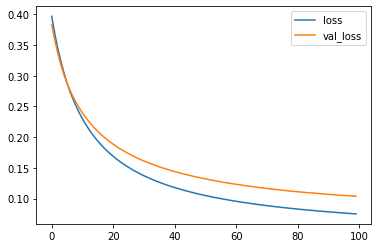

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fitting.history['loss'], label = 'loss')
plt.plot(fitting.history['val_loss'],label='val_loss')
plt.legend()